# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

# Load the dataset


In [454]:
df = pd.read_csv('Traffic_Jams.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [455]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [457]:
df.iloc[9:14, 9:19]

""
9
10
11
12
13


In [458]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [459]:
df.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
5,1:15:00 AM,10,Tuesday,15,1,1,39,56,normal
6,1:30:00 AM,10,Tuesday,14,2,2,27,45,normal
7,1:45:00 AM,10,Tuesday,13,2,1,20,36,normal
8,2:00:00 AM,10,Tuesday,7,0,0,26,33,normal
9,2:15:00 AM,10,Tuesday,13,0,0,34,47,normal


In [460]:
df.tail(12)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6312,11:15:00 PM,8,Wednesday,18,5,1,15,39,normal
6313,11:45:00 PM,8,Wednesday,10,5,0,14,29,normal
6314,1:00:00 AM,9,Thursday,18,3,0,14,35,normal
6315,1:30:00 AM,9,Thursday,17,1,1,13,32,normal
6316,2:30:00 AM,9,Thursday,12,3,0,17,32,normal
6317,4:00:00 AM,9,Thursday,12,0,1,16,29,normal
6318,5:15:00 AM,9,Thursday,62,12,3,18,95,normal
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [462]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [ ]:
df['Location_Easting_OSGR'].unique()

array([381880., 413520., 516260., ..., 460040., 511930., 509970.])

In [ ]:
df['Longitude'].unique()

array([-2.268891, -1.802453, -0.327073, ..., -0.178465, -1.591972,
       -0.334114])

In [ ]:
df['Police_Force'].unique()

array([21, 20,  1, 14, 31,  4,  3, 30,  5,  6, 13, 22, 48,  7, 12, 16, 10,
       11, 32, 23, 17], dtype=int64)

In [ ]:
df['Accident_Severity'].unique()

array([3, 2, 1], dtype=int64)

In [ ]:
df['Number_of_Vehicles'].unique()

array([ 2.,  1.,  3., nan,  4.,  5.,  8.,  6.,  7.,  9., 18., 11., 10.])

In [ ]:
df['Number_of_Casualties'].unique()

array([ 2,  1,  3,  7,  5,  4,  6,  8,  9, 10, 11, 13, 14, 23, 17, 16],
      dtype=int64)

In [ ]:
df['Date'].unique()

array(['24/04/2005', '08/10/2005', '02/04/2005', '26/05/2005',
       '11/01/2005', '17/11/2005', '06/10/2005', '19/12/2005',
       '07/10/2005', '17/03/2005', '31/05/2005', '05/05/2005',
       '04/06/2005', '23/11/2005', '10/04/2005', '23/08/2005',
       '31/03/2005', '12/12/2005', '17/12/2005', '14/11/2005',
       '23/12/2005', '19/02/2005', '18/03/2005', '05/07/2005',
       '25/05/2005', '24/02/2005', '29/09/2005', '05/01/2005',
       '21/06/2005', '24/08/2005', '21/07/2005', '16/07/2005',
       '13/09/2005', '02/08/2005', '15/12/2005', '04/05/2005',
       '06/05/2005', '11/03/2005', '14/04/2005', '01/09/2005',
       '16/02/2005', '27/07/2005', '12/04/2005', '24/03/2005',
       '04/10/2005', '25/07/2005', '28/06/2005', '09/10/2005',
       '05/09/2005', '01/06/2005', '06/06/2005', '29/11/2005',
       '08/11/2005', '16/11/2005', '29/08/2005', '27/08/2005',
       '09/11/2005', '10/07/2005', '24/12/2005', '20/12/2005',
       '29/06/2005', '18/04/2005', '10/09/2005', '13/12

In [ ]:
df['Day_of_Week'].unique()

array([ 1.,  7.,  5.,  3.,  2.,  6.,  4., nan])

In [ ]:
df['Time'].unique()

array(['16:39', '14:25', '10:20', ..., '04:06', '01:14', '04:48'],
      dtype=object)

In [ ]:
df['Local_Authority_(District)'].unique()

array([254., 300.,  25., 251., 210., 346., 305.,  75.,  62., 303., 329.,
         8.,  92., 106., 109.,  82., 203.,   1., 277., 204., 570.,   5.,
       307., 107., 309.,  73., 206., 257., 101., 126., 186., 232., 146.,
       150., 102.,  61., 306.,  74., 258.,  20.,  21.,  14., 279., 162.,
       215., 276., 200., 253., 341.,  24.,  27., 323.,  28.,  22., 354.,
        31., 124., 120., 292.,  18., 290., 320., 128.,  23.,  72.,  79.,
       285., 293., 123., 147., 345.,   6.,  71., 302.,  32.,  30., 356.,
       228.,  80., 280., 351.,   2.,  95., 245., 184., 114., 189., 202.,
       278., 104.,  76.,  91., 100.,  64., 355.,  93., 347.,   9.,   7.,
        11., 241.,  19., 148., 282., 112.,   4., 233., 127.,  65., 273.,
       182., 250., 161., 240., 110.,  84.,  10., 255., 122., 180., 165.,
       281.,  15.,  90.,  13.,  16., 149.,  26.,  70., 213., 231.,  17.,
       143., 144.,  85., 294., 168., 325., 160., 256., 142.,   3., 121.,
       342.,  83., 340., 211., 324., 243., 187., 35

In [ ]:
df['Local_Authority_(Highway)'].unique()

array(['E10000028', 'E08000025', 'E09000018', 'E08000016', 'E06000018',
       'E08000028', 'E10000017', 'E10000006', 'E08000027', 'E10000007',
       'E09000028', 'E08000013', 'E08000005', 'E08000007', 'E08000034',
       'E09000033', 'E10000034', 'E08000035', 'E09000001', 'E09000030',
       'E08000030', 'E08000006', 'E08000031', 'E08000036', 'E06000021',
       'E08000002', 'E06000049', 'E10000023', 'E06000013', 'E08000020',
       'E08000024', 'E08000003', 'E08000029', 'E09000008', 'E09000029',
       'E09000026', 'E06000051', 'E06000047', 'E08000019', 'E08000032',
       'E10000024', 'E09000027', 'E09000009', 'E06000015', 'E09000005',
       'E09000024', 'E10000019', 'E09000014', 'E06000006', 'E06000050',
       'E10000031', 'E09000004', 'E06000007', 'E09000021', 'E06000019',
       'E08000021', 'E09000011', 'E06000009', 'E08000026', 'E09000010',
       'E09000003', 'E06000010', 'E09000007', 'E08000015', 'E06000004',
       'E08000010', 'E06000014', 'E08000033', 'E08000004', 'E080

In [ ]:
df['1st_Road_Class'].unique()

array([ 5.,  3.,  4.,  6.,  1.,  2., nan])

In [ ]:
df['Road_Type'].unique()

array(['Single carriageway', 'Slip road', 'Dual carriageway',
       'One way street', 'Roundabout', 'Unknown', nan], dtype=object)

In [ ]:
df['Speed_limit'].unique()

array([60., 20., 30., 40., 70., 50., nan])

In [ ]:
df['2nd_Road_Class']

0       -1.0
1       -1.0
2        4.0
3       -1.0
4       -1.0
        ... 
51995    5.0
51996    3.0
51997    6.0
51998    6.0
51999    6.0
Name: 2nd_Road_Class, Length: 52000, dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Date"].convert_dtypes(int)

0        24/04/2005
1        08/10/2005
2        02/04/2005
3        26/05/2005
4        11/01/2005
            ...    
51995    10/11/2005
51996    17/08/2005
51997    22/08/2005
51998    18/12/2005
51999    18/04/2005
Name: Date, Length: 52000, dtype: string

In [ ]:
df["Date"].describe().sum

<bound method Series.sum of count          52000
unique           366
top       21/10/2005
freq             249
Name: Date, dtype: object>

In [ ]:
Last_Three_Months_2005 = df[df["Date"] > '30/09/2005']
Last_Three_Months_2005

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
10,32790,200504EL05010,374680.0,428440.0,-2.385472,53.751703,4,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Dry,1.0,Yes,E01025047,2005.0
16,46997,200506P923358,393070.0,412270.0,-2.106214,53.606935,6,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01005558,2005.0
94,33599,200504FB05042,383060.0,432380.0,-2.258605,53.787458,4,3,NaN,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01024907,2005.0
131,76857,2005170S11135,444920.0,521850.0,-1.306366,54.589866,17,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012261,2005.0
183,76188,2005170L13045,457050.0,512990.0,-1.120388,54.509029,17,3,2.0,3,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,2.0,Yes,E01012124,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,79349,200520E099201,404600.0,283060.0,-1.933759,52.445455,20,3,2.0,1,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01009285,2005.0
51778,23957,200501YE80463,534380.0,196270.0,-0.059044,51.649121,1,3,1.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01001511,2005.0
51812,99280,20053102A0332,453570.0,349260.0,-1.202521,53.037921,31,3,2.0,1,...,6009.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,No,E01027933,2005.0
51832,45925,200506N032062,379250.0,411540.0,-2.315031,53.600006,6,2,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01004962,2005.0


In [ ]:
Last_Three_Months_2005["Date"].min()

'30/10/2005'

In [ ]:
Last_Three_Months_2005["Date"].max()

'31/12/2005'

In [ ]:
Year_Date = Last_Three_Months_2005[["Year", "Date"]]
Year_Date

,Year,Date
10,2005.0,31/05/2005
16,2005.0,31/03/2005
94,2005.0,31/08/2005
131,2005.0,31/03/2005
183,2005.0,30/12/2005
...,...,...
51707,2005.0,31/05/2005
51778,2005.0,31/05/2005
51812,2005.0,31/01/2005
51832,2005.0,31/07/2005


In [ ]:
df["Year"].max() - df["Year"].min()

0.0

In [ ]:
df.sort_values(by=['Day_of_Week'], ascending=True).head()


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
29402,64445,2.01E+12,420640.0,441230.0,-1.687613,53.866875,13,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01011269,2005.0
6397,75406,2005160D03300,513920.0,430370.0,-0.273535,53.757238,16,3,2.0,1,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01012895,2005.0
29413,73808,2005160B01690,505000.0,411080.0,-0.415294,53.585791,16,3,2.0,1,...,15.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01013267,2005.0
29441,94472,2.01E+12,438710.0,251420.0,-1.435546,52.159666,23,2,2.0,2,...,6406.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01031194,2005.0


In [ ]:
df_encode = df_encode('')
de_encode

NameError: name 'df_encode' is not defined

<Axes: >

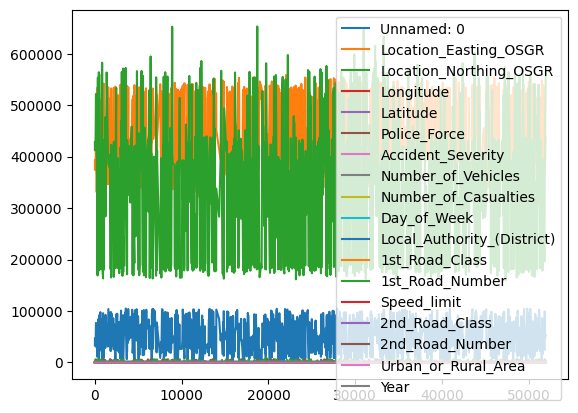

In [ ]:
Last_Three_Months_2005.plot()

In [ ]:
df['Accident_Index']
df['Location_Easting_OSGR']
df['Longitude']
df['Police_Force']
df['Accident_Severity']
df['Number_of_Vehicles']
df['Number_of_Casualties']
df['Date']
df['Day_of_Week']
df['Time']
df['Local_Authority_(District)']
df['Local_Authority_(Highway)']
df['1st_Road_Class']
df['Road_Type']
df['Speed_limit']
df['2nd_Road_Class']

0       -1.0
1       -1.0
2        4.0
3       -1.0
4       -1.0
        ... 
51995    5.0
51996    3.0
51997    6.0
51998    6.0
51999    6.0
Name: 2nd_Road_Class, Length: 52000, dtype: float64

In [ ]:
df['Number_of_Vehicles'].isnull().sum()

802

In [ ]:
df['Day_of_Week'].isnull().sum() 

537

In [ ]:
df['Speed_limit'].isnull().sum()

1041

In [ ]:
df.isnull().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

In [ ]:
Last_Three_Months_2005 = df.drop_duplicates
Last_Three_Months_2005

<bound method DataFrame.drop_duplicates of        Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0           88245       2.01E+12               381880.0   
1           78422  200520D303703               413520.0   
2           19574  200501TX20137               516260.0   
3           79337  200520E097001               401530.0   
4           89121       2.01E+12               421760.0   
...           ...            ...                    ...   
51995       58660  200511DJ27240               427910.0   
51996      101443  20053102C2156               450720.0   
51997         437  200501BS70452               526580.0   
51998       61353       2.01E+12               426800.0   
51999       75359  2005160D02810               509970.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                    298700.0  -2.268891  52.585773            21   
1                    284740.0  -1.802453  52.460412            20   
2                    177370.0  -0.327073 

In [ ]:
df['Date'].min()

'01/01/2005'

In [ ]:
df['Date'].max()

'31/12/2005'

In [ ]:
Last_Three_Months_2005['Year'].value_counts()

Year
2005.0    1280
Name: count, dtype: int64

In [ ]:
Last_Three_Months_2005['Speed_limit'].value_counts()

Speed_limit
30.0    909
60.0    150
40.0     86
70.0     76
50.0     34
20.0      3
Name: count, dtype: int64

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
X_train = df['Speed_limit']
y=['']

0        60.0
1        20.0
2        30.0
3        40.0
4        70.0
         ... 
51995    30.0
51996    30.0
51997    30.0
51998    60.0
51999    40.0
Name: Speed_limit, Length: 52000, dtype: float64

In [ ]:
df.shape

(52000, 30)

In [ ]:
Last_Three_Months_2005.shape

(1280, 30)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)

X_train_minmax

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

NameError: name 'scaler' is not defined

In [ ]:
scaler.mean

NameError: name 'scaler' is not defined

In [ ]:
X, y = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
drop_enc = preprocessing.OneHotEncoder(drop='Pedestrian_Crossing-Physical_Facilities',handle_unknown='nan').fit(X)

InvalidParameterError: The 'drop' parameter of OneHotEncoder must be a str among {'if_binary', 'first'}, an array-like or None. Got 'Pedestrian_Crossing-Physical_Facilities' instead.

In [ ]:
drop_enc = df(drop='Year').fit(X)

TypeError: 'DataFrame' object is not callable

In [ ]:
scaler = StandardScaler().fit(X_train)
scaler

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

In [ ]:
df['Accident_Index']
df['Location_Easting_OSGR']
df['Longitude']
df['Police_Force']
df['Accident_Severity']
df['Number_of_Vehicles']
df['Number_of_Casualties']
df['Date']
df['Day_of_Week']
df['Time']
df['Local_Authority_(District)']
df['Local_Authority_(Highway)']
df['1st_Road_Class']
df['Road_Type']
df['Speed_limit']
df['2nd_Road_Class']

AttributeError: 'function' object has no attribute 'df'

In [ ]:
sns.relplot(
    data=Last_Three_Months_2005, x="Road_Surface_Conditions", y="Pedestrian_Crossing-Human_Control",
    size="Number_of_Vehicles", sizes=(150, 200))

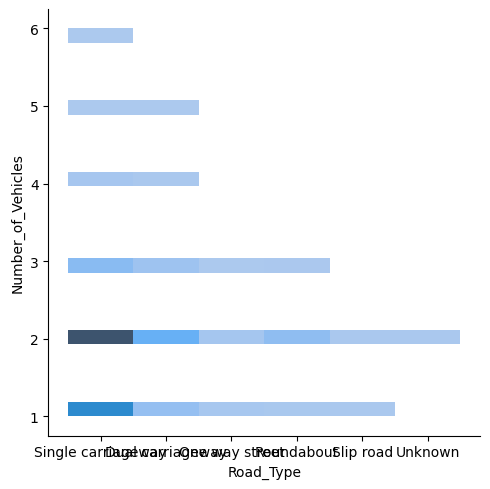

In [ ]:
sns.displot(Last_Three_Months_2005, x="Road_Type",y='Number_of_Vehicles')

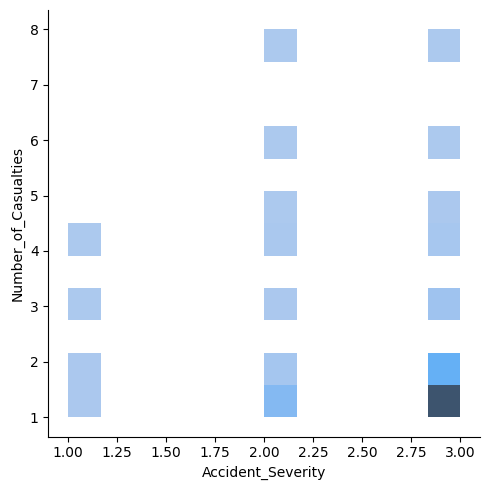

In [ ]:
sns.displot(Last_Three_Months_2005, x='Accident_Severity', y="Number_of_Casualties")

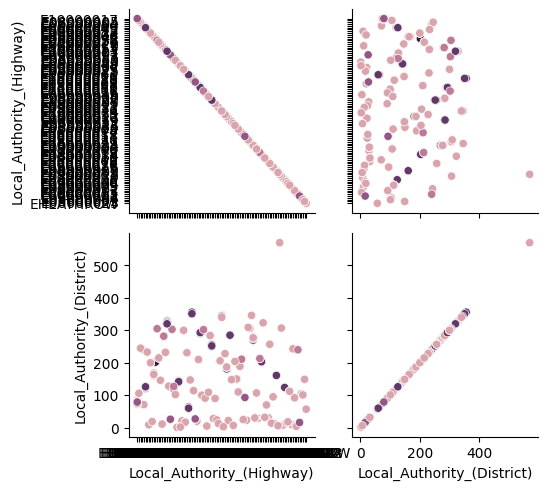

In [ ]:
g = sns.PairGrid(Last_Three_Months_2005, vars=['Local_Authority_(Highway)', 'Local_Authority_(District)'], hue="Speed_limit")
g.map(sns.scatterplot)

<Axes: xlabel='Longitude', ylabel='Latitude'>

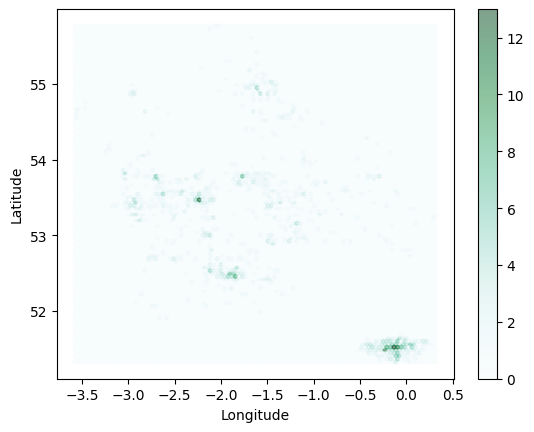

In [ ]:
Last_Three_Months_2005.plot.hexbin(x="Longitude", y="Latitude", alpha=0.5)

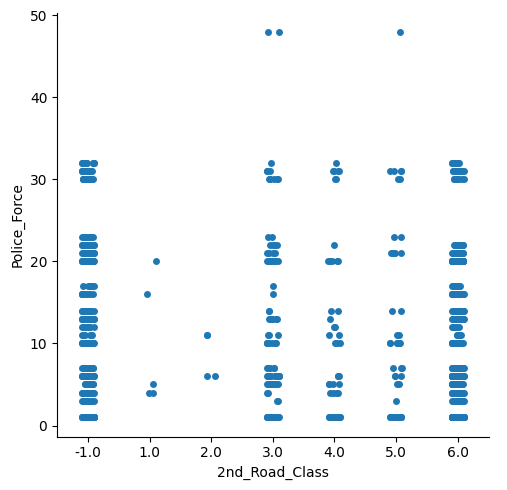

In [ ]:
sns.catplot(data=Last_Three_Months_2005.query("Speed_limit != 0"), x="2nd_Road_Class", y="Police_Force")

In [ ]:
Last_Three_Months_2005['Count'] = Last_Three_Months_2005['Unnamed: 0'] 

C:\Users\ksmc\AppData\Local\Temp\ipykernel_6216\3322302520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Last_Three_Months_2005['Count'] = Last_Three_Months_2005['Unnamed: 0']


In [ ]:
Last_Three_Months_2005.sample()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Count
43544,72525,200514E108605,442970.0,383920.0,-1.355944,53.350417,14,2,2.0,1,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01008034,2005.0,72525


In [ ]:
ax = sns.heatmap(Last_Three_Months_2005, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

NameError: name 'data' is not defined

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [ ]:
Last_Three_Months_2005.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
10,32790,200504EL05010,374680.0,428440.0,-2.385472,53.751703,4,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Dry,1.0,Yes,E01025047,2005.0
16,46997,200506P923358,393070.0,412270.0,-2.106214,53.606935,6,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01005558,2005.0
94,33599,200504FB05042,383060.0,432380.0,-2.258605,53.787458,4,3,NaN,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01024907,2005.0
131,76857,2005170S11135,444920.0,521850.0,-1.306366,54.589866,17,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012261,2005.0
183,76188,2005170L13045,457050.0,512990.0,-1.120388,54.509029,17,3,2.0,3,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,2.0,Yes,E01012124,2005.0


In [ ]:
X = ['Did_Police_Officer_Attend_Scene_of_Accident']
Y = ['Number_of_Vehicles']

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),

                            max_samples=0.5, max_features=0.5)

In [ ]:
Y = ['Speed_limit']


In [ ]:
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X,y, cv=5)
scores

### Evaluate the model performance

In [ ]:

X, y = df(random_state=0)

X_train, X_test = X[:120], X[2000:]

y_train, y_test = y[:122], y[2000:]

clf = BoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

TypeError: 'DataFrame' object is not callable

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

### Evaluate the model performance

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [ ]:
from sklearn.ensemble import StackingClassifier

### Define meta-learner (LogisticRegression)

In [ ]:
get_metadata_routing()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [ ]:
from sklearn.ensemble import BoostingRegressor

from sklearn.ensemble import StackingRegressor

final_estimator = BoostingRegressor(

    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,

    random_state=42)

reg = StackingRegressor(

    estimators=estimators,

    final_estimator=final_estimator)

### Evaluate the model performance

In [ ]:
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here: